In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.stats import mad_std
from photutils.segmentation import detect_sources, SourceCatalog, detect_threshold
from photutils.background import Background2D, MedianBackground
from photutils.centroids import centroid_com,centroid_quadratic
import statmorph
from statmorph.utils.image_diagnostics import make_figure

In [2]:
path='Savary_training_set_lenses/'
lensed='Lens_simulations/'
non_lensed='LRG_only/'
lensed_source='lensed_source_only/'
RMS='Lenses/RMS/'
PSF='Lenses/PSF/'

files_lensed=os.listdir(path+lensed)
files_non_lensed=os.listdir(path+non_lensed)
files_lensed_source=os.listdir(path+lensed_source)
files_rms=os.listdir(path+RMS)
files_psf=os.listdir(path+PSF)

In [3]:
files=[file for file in files_lensed if (file in files_non_lensed and file in files_lensed_source and file in files_rms and file in files_psf)] #Only take files with all needed files (RMS, PSF, Lens, lensed source, non lensed)

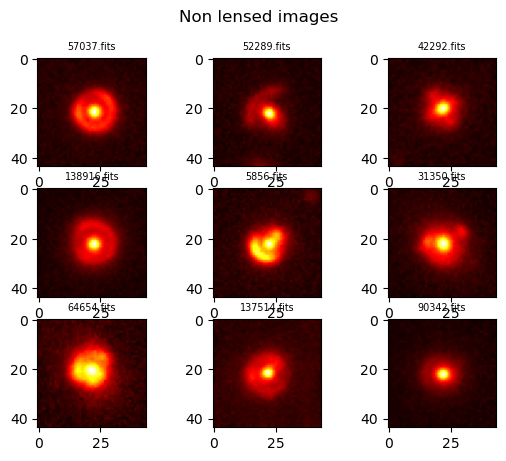

In [18]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Non lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

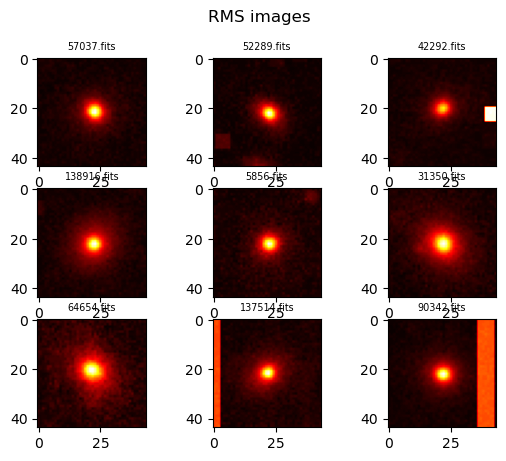

In [5]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+RMS+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('RMS images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

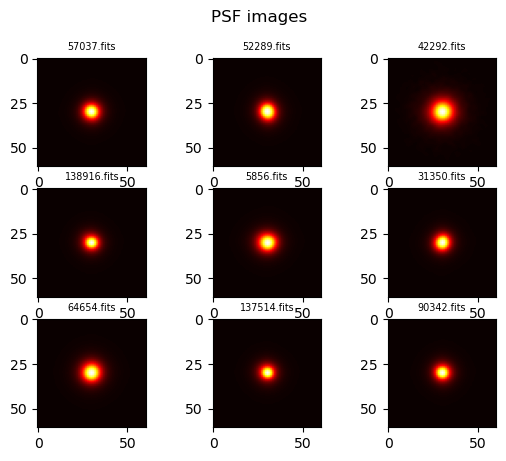

In [6]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+PSF+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('PSF images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

In [15]:
def galaxy_map(segm):
    label = np.argmax(segm.areas)+1
    segm_map=1*(segm.data==label)
    return segm_map

def galaxy_label(segm):
    label = np.argmax(segm.areas)+1
    return label

def mask(segm):
    galaxy=(galaxy_map(segm))
    segm_map=segm.data!=0
    mask=segm_map-galaxy
    bool_mask=mask==1
    return bool_mask

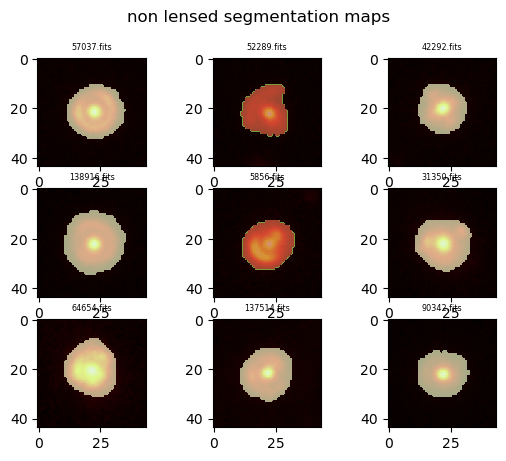

In [27]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    threshold=detect_threshold(image,3)
    segm = detect_sources(image, threshold, npixels=5)
    
    segm_map=galaxy_map(segm)

    segmap_float = ndi.uniform_filter(np.float64(segm_map), size=5)
    segm_map = segmap_float > 0.5

    plt.suptitle('non lensed segmentation maps')
    plt.subplot(330+count)
    plt.title(file, fontsize='xx-small')
    plt.imshow(segm_map, cmap=segm.cmap)
    plt.imshow(image,cmap='hot',alpha=0.3)
plt.show()